In [1]:
#import packages
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.gis import GIS
import pandas as pd

In [2]:
#Connect to web GIS
gis = GIS()

#Public Art work exhibits in DC - url
publicArt_url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Cultural_and_Society_WebMercator/MapServer/51'

#Fetch it as an item
publicArt_item = gis.content.search(publicArt_url)[0]

#Get Feature layer
publicArt_flayer = publicArt_item.layers[0]

# create a Spatially Enabled DataFrame object
publicArt_sdf = pd.DataFrame.spatial.from_layer(publicArt_flayer)
publicArt_sdf.shape

(272, 16)

In [3]:
#First 5 rows
publicArt_sdf.head()

,ADDRESS,ARTIST,ARTWORK,ART_TYPE,DISPLAY,DURATION,LOCATION,MEDIUM,NEIGHBORHOOD,OBJECTID,PROGRAM_SOURCE,SHAPE,SIZE_,TITLE,WARD,YEAR
0,813 S STREET NW,Richard Colman,None,Mural,"Capitol Pool Checkers Club, located at back of...",Temporary,813 s street nw,Aerosol paint,shaw,1,MuralsDC,"{""x"": -8574218.473691195, ""y"": 4709396.9483199...",None,Checker Club,1,2011
1,1320 GOOD HOPE ROAD SE,"Helping Inner City Youth Succeed, Hicks",None,Mural,African Heritage Center for African Dance & Mu...,Temporary,1320b good hope road se,Aerosol paint,anacostia,2,MuralsDC,"{""x"": -8570091.998034226, ""y"": 4702665.0021891...",1209 sq. ft.,Untitled,8,2009
2,745 8TH STREET SE,Michael Hammond,None,Mural,"Sasha Bruce House, mural located on front of b...",Permanent,745 8th street se,Aerosol paint on concrete,capitol hill,3,Commissioned Project,"{""x"": -8571075.81926886, ""y"": 4704464.95563865...",140 sq. feet,Depiction of the House’s Go-go Band,6,2011
3,320 RIGGS ROAD NE,Joel Bergner and Rashad Cuffee,None,Mural,Off the intersection at South Dakota Ave NE & ...,Temporary,357 riggs road ne,Aerosol paint,petworth,4,Neighborhood Projects,"{""x"": -8571770.238307077, ""y"": 4715519.9970951...",None,Life Makes Music,4,2008
4,314 CARROLL STREET NW,"Words, Beats and Life",None,Mural,"Elevation 314, mural is located behind 314 Car...",Temporary,314 carroll street nw,Aerosol paint,takoma,5,Neighborhood Projects,"{""x"": -8573468.71309607, ""y"": 4718075.66699776...",150 x 10',Takoma Green,4,2009


In [4]:
#map with extent and zoom
map1 = gis.map('Washington, DC', 10)
#setting a basemap to the map
map1.basemap = 'gray'

In [5]:
#adding art work feature layer to map and display it
map1.add_layer(publicArt_flayer)
map1

MapView(layout=Layout(height='400px', width='100%'), zoom=10.0)

![map1](https://user-images.githubusercontent.com/13968196/53986820-0dc88400-40d4-11e9-89ab-84da84816144.PNG)

### Horizontal bar chart for Art type

In [6]:
#Generate counts for each 'ART_TYPE'
counts = publicArt_sdf['ART_TYPE'].value_counts()
counts

Mural                                   92
Sculpture                               40
Installation                            28
Tour                                    25
Sculpture, Installation                 11
Performance                              8
Sculpture, installation                  7
Lecture                                  6
Architectural, sign                      4
Performance, installation                4
Mosaic mural                             3
Architectural                            3
Event                                    3
Panel discussion                         3
Suspended                                3
Sculpture, suspended                     2
Mural, mosaic                            2
Photography                              2
Mural, glass                             2
Architectural, neon                      1
Art Installation                         1
Wall Mural- interior                     1
Architectural, engraving                 1
Sculpture, 

In [7]:
#Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#set preferences
sns.set(color_codes=True)
%matplotlib inline

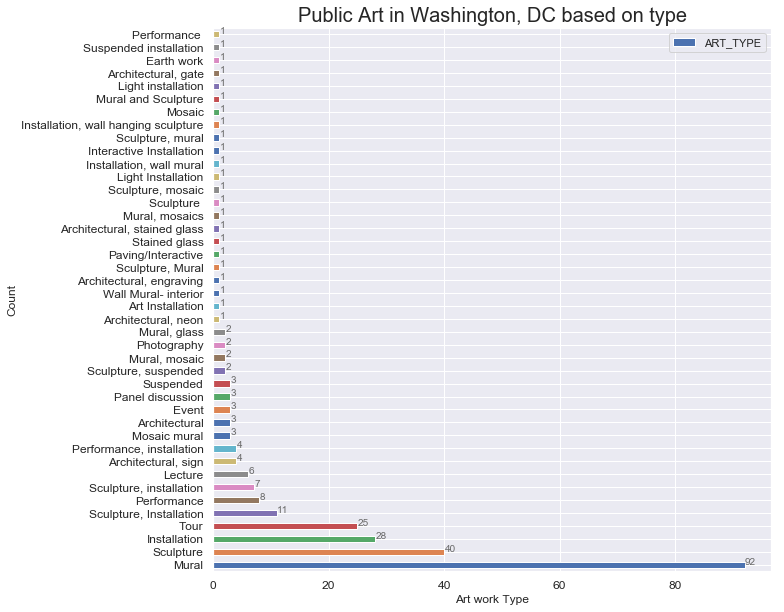

In [8]:
#Generates bar graph
ax = counts.plot(kind='barh', figsize=(10, 10), legend=True, fontsize=12)

#X axis text and display style of categories
ax.set_xlabel("Art work Type", fontsize=12)

#Y axis text
ax.set_ylabel("Count", fontsize=12)

#Title
ax.set_title("Public Art in Washington, DC based on type", fontsize=20)

#Annotations
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

### Pie chart for duration of art exhibit

In [9]:
#Getting unique values for day
duration = list(publicArt_sdf['DURATION'].unique())
print(duration)

['Temporary', 'Permanent']


In [10]:
#Frequency calculation of each day type
sizes = publicArt_sdf['DURATION'].value_counts()
print(sizes)

Temporary    154
Permanent    118
Name: DURATION, dtype: int64


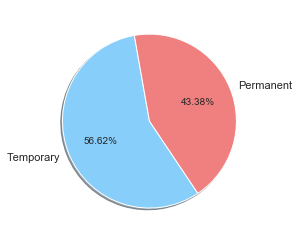

In [11]:
# Data to plot
labels = duration
colors = ['lightskyblue', 'lightcoral']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=100)
plt.show()

In [6]:
#Fetching administrative boundaries (WARDS) for DC
publicArt_url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Administrative_Other_Boundaries_WebMercator/MapServer/31'
publicArt_item = gis.content.search(publicArt_url)[0]
publicArt_flayer = publicArt_item.layers[0]

In [7]:
#Adding it as a layer and displaying the map
map1.add_layer(publicArt_flayer)
map1

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True, zoom=11.0)

![map1_wards](https://user-images.githubusercontent.com/13968196/53986870-2c2e7f80-40d4-11e9-8d92-aa79adb5b606.PNG)